In [1]:
import numpy as np  
import pandas as pd
from math import log10
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.io as pio

In [12]:
def signature_coefficient_relative_importance_barplot(sig_coef_matrix,output_path,output_prefix,
                                                      palette = px.colors.qualitative.Pastel,
                                                      fig_format='pdf',legend_title = 'Species',
                                                      xlabel = 'Relative importantance'):
   sig_coef_matrix = sig_coef_matrix.T
   sig_coef_matrix.columns = [x.capitalize() for x in sig_coef_matrix.columns]
   plot_df = pd.DataFrame()
   plot_df['Species'] = [x.replace('_',' ') for x in sig_coef_matrix.index]
   for c in sig_coef_matrix.columns :
      relative_coef = sig_coef_matrix[c].transform(lambda x: 100 * x/x.sum()).values
      log_relative_coef = list(map(lambda x : log10(x+1),relative_coef))
      #relative_importance = [100 * x / sum(log_relative_coef) for x in log_relative_coef]
      plot_df[c] = log_relative_coef
   plot_df = plot_df.melt(id_vars='Species')
   plot_df['Species'] = [x.capitalize() for x in plot_df['Species'].values]  # type: ignore
   # arrange legend & bar order 
   legend_order = np.unique(plot_df['variable'])
   bar_order = np.unique(plot_df['Species'])
   fig = px.bar(plot_df, x="value", y="variable", color="Species",width=1200, height=500,template='simple_white',
               color_discrete_sequence=palette,category_orders={"variable": legend_order},labels={'value' : xlabel})
   # add legend information
   fig.update_layout(barmode='stack', xaxis={'categoryorder':'array','categoryarray':bar_order}, title_x=0.5,yaxis_title=None,legend={'title' : legend_title})
   pio.write_image(fig,output_path + output_prefix + '_' +'signature_composition_barplot'  + '.' + fig_format,format = fig_format,scale = 2)
   fig.show() 

In [3]:
from math import log10
import matplotlib.pyplot as plt 

def signature_coefficient_relative_importance_loliplot(sig_matrix,output_path,xlabel = 'Species',xticks = None,format = 'png',cmap = 'Set3',fig_size = (7,3)) :
    '''
    sig_matrix : dataframe; x is signature , y is element in signature
    output_path : str ; output folder of fig output
    '''
    # convert sig matrix coef into relative importance
    plot_df = sig_matrix.T.copy()
    for c in plot_df.columns :
        relative_coef = plot_df[c].transform(lambda x: 100 * x/x.sum()).values
        log_relative_coef = list(map(lambda x : log10(x+1),relative_coef))
        plot_df[c] = log_relative_coef
    # plot setting
    n_element = plot_df.shape[0]
    plot_df['Species'] = list(plot_df.index)
    # plot loliplot
    for c in plot_df.columns[:-1] :
        plt.figure(figsize=fig_size)
        sns.barplot(data=plot_df,y=c,x='Species',palette=cmap)
        plt.title(c.capitalize())
        if c != plot_df.columns[-2] :
            plt.xticks([])
            plt.xlabel('')
            plt.ylabel('')
        else :
            if not xticks :
                xticks = list(plot_df.index)
                #xlabel = [x.split('_')[0][0] + '.' + x.split('_')[1] for x in plot_df.index]
            x = np.arange(n_element)
            plt.xticks(x,xticks,rotation=60)
            plt.xlabel(xlabel)
            plt.ylabel('')
            #plt.ylabel("Relative importance")
        plt.savefig("%s%s_sig_relative_importance_barplot.%s" % (output_path,c.replace(' ','_'),format),dpi=300,format = 'svg')
        plt.show()


In [14]:
bifido_sig_coef.shape

(3, 9)

In [4]:
condition = 'mci'
bifido_sig_coef = pd.read_csv("/home/bruce1996/data/MCI/manuscript_v3.2/%s/signature_matrix/Bifidobacterium_signature_coefficient_matrix.txt" % condition,sep='\t',index_col=0)
lacto_sig_coef = pd.read_csv("/home/bruce1996/data/MCI/manuscript_v3.2/%s/signature_matrix/Lactobacillus_signature_coefficient_matrix.txt" % condition,sep='\t',index_col=0)

bifido_sig_coef.columns = [x[3:] for x in bifido_sig_coef.columns]
bifido_order = ["Bifidobacterium_pseudocatenulatum","Bifidobacterium_longum","Bifidobacterium_adolescentis","Bifidobacterium_bifidum",
                "Bifidobacterium_dentium","Bifidobacterium_breve","Bifidobacterium_animalis","Bifidobacterium_moukalabense","Bifidobacterium_anseris"]
bifido_sig_coef = bifido_sig_coef.loc[:,bifido_order]

In [13]:
signature_coefficient_relative_importance_barplot(bifido_sig_coef,"/home/bruce1996/repo/Microbiome_health_indicator/tmp/",'test')

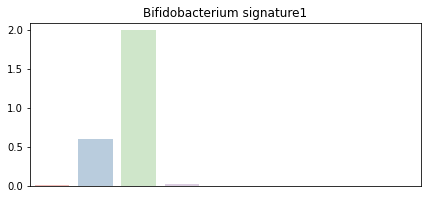

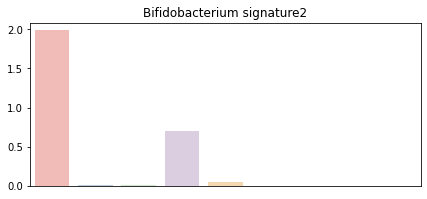

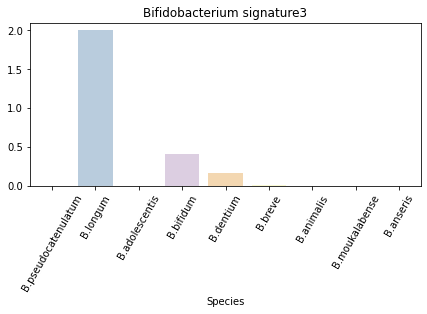

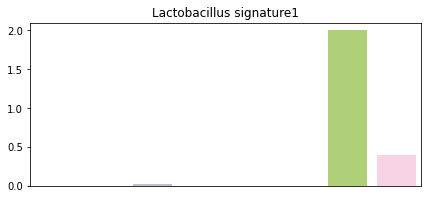

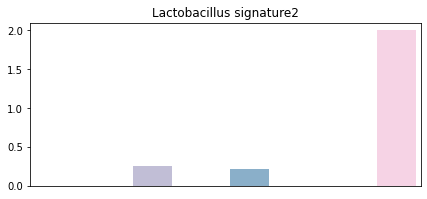

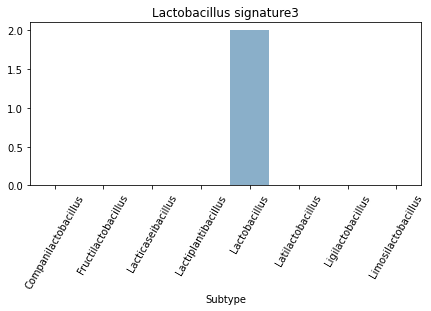

In [5]:
bifido_x_label = [x.split('_')[0][0] + '.' + x.split('_')[1] for x in bifido_sig_coef.columns]
signature_coefficient_relative_importance_loliplot(bifido_sig_coef,"/home/bruce1996/repo/Microbiome_health_indicator/tmp/",xticks=bifido_x_label,format='pdf',fig_size=(7,3),cmap='Pastel1')
lacto_x_label = [x.split('_')[0] for x in lacto_sig_coef.columns]
signature_coefficient_relative_importance_loliplot(lacto_sig_coef,"/home/bruce1996/repo/Microbiome_health_indicator/tmp/",xticks=lacto_x_label,format='pdf',fig_size=(7,3),xlabel='Subtype',cmap='Set3')